In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
train = pd.read_csv('train.csv')
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
train.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [5]:
train.shape

(381109, 12)

In [8]:
#Finding the null values
len(train[train.isnull().any(axis=1)])

0

In [12]:
print("Number of unique values in each column->")
for col in train.columns:
    print(col,"    ",len(train[col].unique()))

Number of unique values in each column->
id      381109
Gender      2
Age      66
Driving_License      2
Region_Code      53
Previously_Insured      2
Vehicle_Age      3
Vehicle_Damage      2
Annual_Premium      48838
Policy_Sales_Channel      155
Vintage      290
Response      2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BA0190B630>,
      dtype=object)

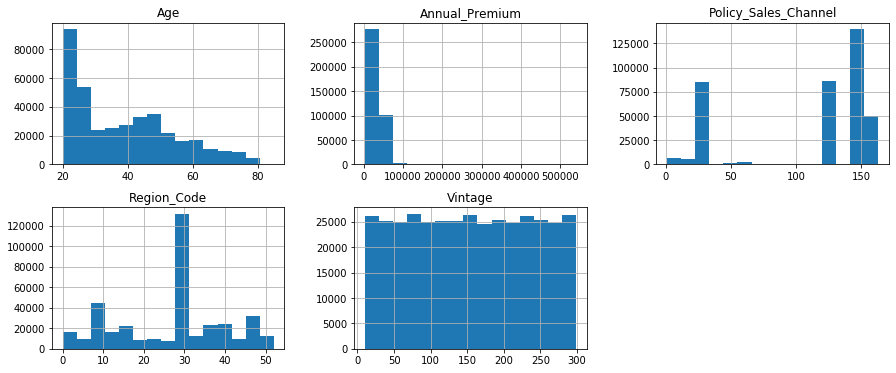

In [17]:
#Plotting histograms for the numerical variables/ features
numerical = ['Age','Region_Code','Annual_Premium','Policy_Sales_Channel','Vintage']
train[numerical].hist(bins=15, figsize=(15, 6), layout=(2,3))

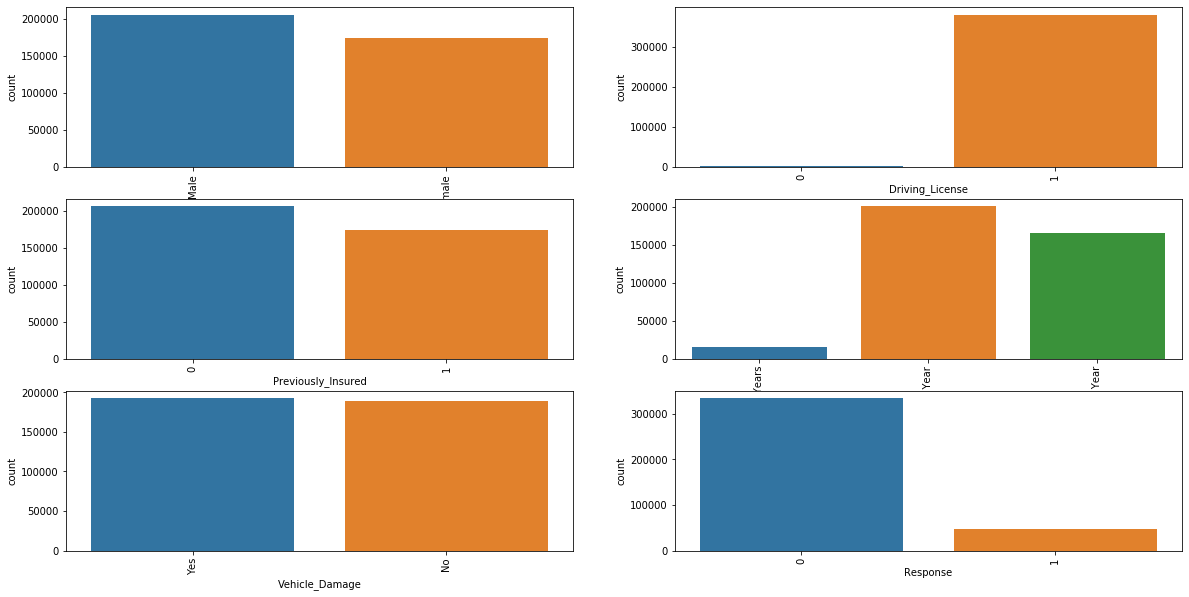

In [15]:
categorical = ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Response']
fig, ax = plt.subplots(3, 2, figsize=(20, 10))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(train[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

In [18]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()

#or label encode those which have dtype as objects- or one hot encode
train["Gender"] = lb_make.fit_transform(train["Gender"])
train["Vehicle_Age"] = lb_make.fit_transform(train["Vehicle_Age"])
train["Vehicle_Damage"] = lb_make.fit_transform(train["Vehicle_Damage"])

train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0


In [19]:
#class weights calculate since it is an imbalanced dataset
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',train.Response.unique(),train.Response.values)
class_weights

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=[1 0], y=[1 0 1 ... 0 0 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


array([4.07952259, 0.56984172])

### Model Training

In [20]:
train.drop(columns=['id'],inplace = True)

In [23]:
y= train['Response']
X = train.drop(columns=['Response'])

In [24]:
print(train.shape)
print(y.shape)
print(X.shape)

(381109, 11)
(381109,)
(381109, 10)


In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=294,stratify=y)#random_state=42
print(X_train.shape, "             ", X_test.shape)

(266776, 10)               (114333, 10)


In [43]:
import xgboost as xgb
clf = xgb.XGBClassifier (n_estimators = 15, seed =123)
clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_train)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
#print("Accuracy:",metrics.accuracy_score(y_train, y_pred))
print("ROC_AUC Score: ", metrics.roc_auc_score(y_train, y_pred))
print( )

y_pred = clf.predict(X_test)
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("ROC_AUC Score: ", metrics.roc_auc_score(y_test, y_pred))

ROC_AUC Score:  0.5000962263043105

ROC_AUC Score:  0.5000364419598606


In [44]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(random_state=123)
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_train)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
#print("Accuracy:",metrics.accuracy_score(y_train, y_pred))
print("ROC_AUC Score: ", metrics.roc_auc_score(y_train, y_pred))
print( )

y_pred = clf.predict(X_test)
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("ROC_AUC Score: ", metrics.roc_auc_score(y_test, y_pred))

ROC_AUC Score:  0.500124858269036

ROC_AUC Score:  0.49997005772869907


In [45]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=11, random_state=0) #,class_weights=class_weights

clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_train)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
#print("Accuracy:",metrics.accuracy_score(y_train, y_pred))
print("ROC_AUC Score: ", metrics.roc_auc_score(y_train, y_pred))
print( )

y_pred = clf.predict(X_test)
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("ROC_AUC Score: ", metrics.roc_auc_score(y_test, y_pred))

ROC_AUC Score:  0.5005420145436688

ROC_AUC Score:  0.5002246402134242


In [52]:
import lightgbm
#import eli5
#from eli5.sklearn import PermutationImportance

"""
categorical_features = [c for c, col in enumerate(train.columns) if 'cat' in col]
train_data = lightgbm.Dataset(x, label=y, categorical_feature=categorical_features)
test_data = lightgbm.Dataset(x_test, label=y_test)

parameters = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'auc',
    'is_unbalance': 'true',
    'boosting': 'gbdt',
    'num_leaves': 31,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'learning_rate': 0.05,
    'verbose': 0
}

model = lightgbm.train(parameters,
                       train_data,
                       valid_sets=test_data,
                       num_boost_round=5000,
                       early_stopping_rounds=100)
#################################################################33
import lightgbm as lgb
d_train = lgb.Dataset(x_train, label=y_train)
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10
clf = lgb.train(params, d_train, 100)
#Prediction
y_pred=clf.predict(x_test)

"""
###################################################
lg=lightgbm.LGBMClassifier(boosting_type='gbdt',n_estimators=500,depth=10,learning_rate=0.04,objective='binary',metric='auc',is_unbalance=True,
                 colsample_bytree=0.5,reg_lambda=2,reg_alpha=2,random_state=294,n_jobs=-1)

lg.fit(X_train,y_train)
print(metrics.roc_auc_score(y_test,lg.predict_proba(X_test)[:,1]))
#Check for Permutation Importance of Features
#perm = PermutationImportance(lg,random_state=294).fit(X_test, y_test)
#eli5.show_weights(perm,feature_names=X_test.columns.tolist())

[LightGBM] [Warning] Unknown parameter: depth
0.8576555621454718


In [67]:
from sklearn.model_selection import RepeatedStratifiedKFold
from tpot import TPOTClassifier
# define model evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search
model = TPOTClassifier(generations=5, population_size=50, cv=cv, scoring='accuracy', verbosity=2, random_state=1, n_jobs=-1)
# perform the search
model.fit(X_train, y_train)
# export the best model
model.export('tpot_sonar_best_model.py')



TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.


RuntimeError: A pipeline has not yet been optimized. Please call fit() first.

In [ ]:
#https://machinelearningmastery.com/tpot-for-automated-machine-learning-in-python/
import autosklearn
#https://machinelearningmastery.com/auto-sklearn-for-automated-machine-learning-in-python/
#https://machinelearningmastery.com/hyperopt-for-automated-machine-learning-with-scikit-learn/

In [53]:
test = pd.read_csv('test.csv')
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [54]:
len(test[test.isnull().any(axis=1)])

0

In [55]:
test["Gender"] = lb_make.fit_transform(test["Gender"])
test["Vehicle_Age"] = lb_make.fit_transform(test["Vehicle_Age"])
test["Vehicle_Damage"] = lb_make.fit_transform(test["Vehicle_Damage"])
id_ = test['id']
test.drop(columns=['id'],inplace = True)
test.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,25,1,11.0,1,1,0,35786.0,152.0,53
1,1,40,1,28.0,0,0,1,33762.0,7.0,111
2,1,47,1,28.0,0,0,1,40050.0,124.0,199
3,1,24,1,27.0,1,1,1,37356.0,152.0,187
4,1,27,1,28.0,1,1,0,59097.0,152.0,297


In [60]:
y_pred = lg.predict(test)

In [61]:
submission = pd.DataFrame()
submission['id'] = id_.values
submission['Response'] = y_pred

In [62]:
submission.head()

,id,Response
0,381110,0
1,381111,1
2,381112,1
3,381113,0
4,381114,0


In [63]:
submission.to_csv("submission.csv")

In [ ]:
#try lightgbm
#try autoML
#apply class weights

#cat boost
#One hot encoding
#convert the Vintage (given in days) into year

